Attempt to decipher nuts and bolts of kernel trick !

Here we take non-linearly seperable data, apply linearSVM, then kernel trick to decipher what exactly happens inside

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [23]:
from sklearn.datasets import make_moons, make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# Get nonlinearly seperable Data

In [62]:
n_samples = 10000

#circles = make_circles(n_samples=n_samples, factor=.5)
#moons = make_moons(n_samples=n_samples)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
#no_structure = np.random.rand(n_samples, 2), None
#datasets = [noisy_circles, noisy_moons,no_structure]

datasets = [noisy_circles, noisy_moons]

# Train a simple linear SVM it should do bad on both sets

LINEAR SVM


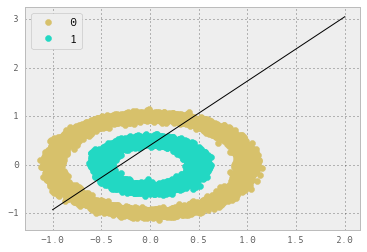

	precision 	recall 		f1-score 	support
0 	0.54 		0.42 		0.48 		1249.00
1 	0.53 		0.65 		0.58 		1251.00
LINEAR SVM


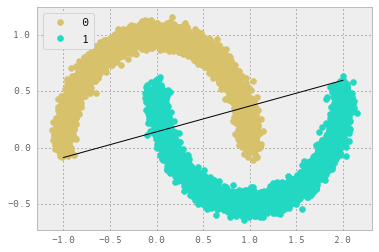

	precision 	recall 		f1-score 	support
0 	0.88 		0.87 		0.88 		1238.00
1 	0.88 		0.89 		0.88 		1262.00


In [67]:
from sklearn import svm


xx = np.linspace(-1,2)

for data in datasets:
    X, y = data
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    df = pd.DataFrame(X, columns = ('x', 'y'))
    df['class'] = y

    groups = df.groupby('class')

    # Plot
    plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
    colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

    fig, ax = plt.subplots()
    ax.set_color_cycle(colors)
    #ax.set_prop_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
    ax.legend(numpoints=1, loc='upper left')

    #plt.show()
    
    # train a linear SVM
    linear_svm = svm.SVC(kernel='linear', C = 1.0)
    linear_svm.fit(X_train,y_train)
    y_pred = linear_svm.predict(X_test)
    precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, y_pred)

    #intuituion behind line plotting is given in next cell
    w = linear_svm.coef_[0]
    #print(w)
    a = -w[0] / w[1]
    #xx = np.linspace(0,12)
    yy = a * xx - linear_svm.intercept_[0] / w[1]
    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

    #plt.scatter(X[:, 0], X[:, 1], c = y)
    #plt.legend()
    
    
    print "LINEAR SVM"
    plt.show()
    print '\t', 'precision','\trecall', '\t\tf1-score','\tsupport'
    print "%d \t%0.2f \t\t%0.2f \t\t%0.2f \t\t%0.2f" %(0, precision[0], recall[0], fbeta_score[0], support[0])
    print "%d \t%0.2f \t\t%0.2f \t\t%0.2f \t\t%0.2f" %(1, precision[1], recall[1], fbeta_score[1], support[1])

    

# Intuition behind decision boundary in the plot

hypothesis is 
$$z = \theta_0 + \theta_0 x + \theta_2 y$$

This plane is perpendicular to data plane. So, to plot the line put Z=0 and calculate for y interms of x.

$$ y = \frac{- \theta_1}{\theta_2} \times x +  \frac{- \theta_0}{\theta_2}$$

where $$\theta_0 = intercept$$

This is exactly what the equation of line in above code is.

# Now train a SVM with kernel

Non-Linear SVM with RBF


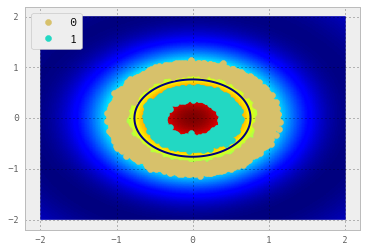

	precision 	recall 		f1-score 	support
0 	1.00 		1.00 		1.00 		1272.00
1 	1.00 		1.00 		1.00 		1228.00
Non-Linear SVM with RBF


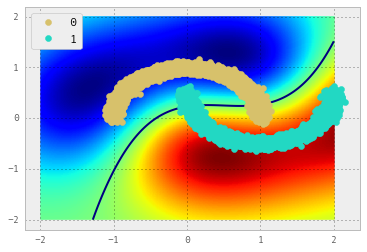

	precision 	recall 		f1-score 	support
0 	0.92 		0.91 		0.92 		1251.00
1 	0.91 		0.92 		0.92 		1249.00


In [115]:
from sklearn import svm


xx = np.linspace(-1,2)

for data in datasets:
    X, y = data
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    df = pd.DataFrame(X, columns = ('x', 'y'))
    df['class'] = y

    groups = df.groupby('class')

    # Plot
    plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
    colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

    fig, ax = plt.subplots()
    ax.set_color_cycle(colors)
    #ax.set_prop_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
    ax.legend(numpoints=1, loc='upper left')

    #plt.show()
    
    # train a non-linear SVM
    clf = svm.NuSVC()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, y_pred)

    # plot the decison function
    # plot the decision function for each datapoint on the grid - intuition behind the plot is given below
    xx, yy = np.meshgrid(np.linspace(-2, 2, 500),np.linspace(-2, 2, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',           origin='lower')
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,linetypes='--')

    #plt.scatter(X[:, 0], X[:, 1], c = y)
    #plt.legend()
    
    
    print "Non-Linear SVM with RBF"
    plt.show()
    print '\t', 'precision','\trecall', '\t\tf1-score','\tsupport'
    print "%d \t%0.2f \t\t%0.2f \t\t%0.2f \t\t%0.2f" %(0, precision[0], recall[0], fbeta_score[0], support[0])
    print "%d \t%0.2f \t\t%0.2f \t\t%0.2f \t\t%0.2f" %(1, precision[1], recall[1], fbeta_score[1], support[1])

    

# Code behind the decision boundary countor plot

Dummy code:

    nx, ny = (3, 4)
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    xv, yv = np.meshgrid(x, y)
    
        np.linspace(0, 1, nx) creates 3 pts equally spaced between [0,1]
        np.linspace(0, 1, ny) creates 4 pts equally spaced between [0,1]
        
    print x, y
       [ 0.   0.5  1. ] [ 0.          0.33333333  0.66666667  1.        ]
       
    create a grid from these two !
   
   
    print xv   # repeats same row
    
        array([[ 0. ,  0.5,  1. ],
           [ 0. ,  0.5,  1. ],
           [ 0. ,  0.5,  1. ],
           [ 0. ,  0.5,  1. ]])   
           
    print yv    # this is where corresponding y values come
    
        array([[ 0.        ,  0.        ,  0.        ],
           [ 0.33333333,  0.33333333,  0.33333333],
           [ 0.66666667,  0.66666667,  0.66666667],
           [ 1.        ,  1.        ,  1.        ]])

        # how to generate all points in grid ??? pythonic way !!
        
        # flatten xv and append them along with last axis - ravel() does this
    xv.ravel() 
        
        array([ 0. ,  0.5,  1. ,  0. ,  0.5,  1. ,  0. ,  0.5,  1. ,  0. ,  0.5,
        1. ])
        
        # flatten xy values 
    yv.ravel()
    
        array([ 0.        ,  0.        ,  0.        ,  0.33333333,  0.33333333,
        0.33333333,  0.66666667,  0.66666667,  0.66666667,  1.        ,
        1.        ,  1.        ])
        
        now just pair ith values from each of the 2 arrys - you have the whole grid - numpy.c_[] does this 
        
        For each point on grid, compute distance from from decision boundary via decision_function() of classifier. 
        This is Z. Compute contours on Z. Black part is the boundary.
    
    



In [113]:
print clf.decision_function_shape

None


In [114]:
clf.coef_

ValueError: coef_ is only available when using a linear kernel

# now Plot the data post transformation 